# I-94 analysis

In this project we re gonna look at some traffic problems on I-94, make the data visualisation and find solutions for this problems. I-94 is an east–west Interstate Highway connecting the Great Lakes more abount it [here](https://en.wikipedia.org/wiki/Interstate_94). Data set: [link](https://archive.ics.uci.edu/ml/machine-learning-databases/00492/)

At first we re gonna import some useful libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now we re gonna read the file using pandas read_csv method:

In [2]:
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv.gz")

Inspect firt 5 rows, last 5 rows, use the info and describe method:

In [3]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


We can see that numeric values dominate in this set, but what is disturbing? It's the date time which is object type, we wanna to change it to the date time object:

In [6]:
traffic["date_time"] = pd.to_datetime(traffic.date_time)

In [7]:
traffic.date_time.dtype

dtype('<M8[ns]')

All right now it looks quite good so we re gonna use the describe method next:

In [8]:
traffic.describe(include="all", datetime_is_numeric=True)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,48204,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,12,NaN,NaN,NaN,NaN,11,38,NaN,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,NaN,NaN
freq,48143,NaN,NaN,NaN,NaN,15164,11665,NaN,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,2016-01-05 10:46:16.773711616,3259.818355
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,2012-10-02 09:00:00,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,2014-02-06 11:45:00,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,2016-06-11 03:30:00,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,2017-08-11 06:00:00,4933.000000
max,NaN,310.070000,9831.300000,0.510000,100.000000,NaN,NaN,2018-09-30 23:00:00,7280.000000


We re gonna inspect also the null values:

In [9]:
traffic.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

It's allright, we have made first "scratching surfaces" investigation, it's time to go further!

## Analyzing Traffic Volume

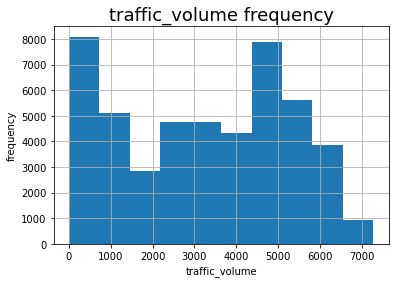

In [10]:
traffic.traffic_volume.hist()
plt.xlabel("traffic_volume")
plt.ylabel("frequency")
plt.title("traffic_volume frequency", fontsize=18)
plt.show()

In [11]:
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-01 09:00:00 and 2018-09-30 23:00:00, the hourly traffic varied from 0 to 7280 cars, with an average 3260 cars, about 25 % of the time there were only 1193 cars or fewer passing the station every each hour - this probably occurs durning the night, or when a road is under construction. However 25 % of the time, the traffic volume was four times as much (4,993 cars or more)

this observation lead us to further obervation: the night time and the daytime

## Comparing the nighttime and daytime

We will start by dividing the dataset int two parts:

* daytime data: between 7 a.m to 7 p.m

* nighttime data: between 7 p.m to 7.am

In [12]:
traffic.date_time.dt.hour.unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
        2,  3,  4,  5,  6,  8,  7], dtype=int64)

We can see that time is in 24 format so it' make it easier to sort

In [13]:
daytime = traffic.loc[traffic.date_time.dt.hour.between(7,18)].copy()

In [14]:
daytime.date_time.dt.hour.sort_values().unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype=int64)

In [15]:
nighttime = traffic.loc[(traffic.date_time.dt.hour >= 19) | (traffic.date_time.dt.hour < 7)]

In [16]:
nighttime.date_time.dt.hour.unique()

array([19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [17]:
print("daytime: " + str(daytime.shape))
print()
print("nighttime: " + str(nighttime.shape))

daytime: (23877, 9)

nighttime: (24327, 9)


The signifficant difference in row numbers between day and night is due to a few hours of missing data:

In [18]:
traffic.iloc[176:178]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
176,None,281.17,0.0,0.0,90,Clouds,overcast clouds,2012-10-10 03:00:00,361
177,None,281.25,0.0,0.0,92,Clear,sky is clear,2012-10-10 06:00:00,5875


## Comparing the nighttime and daytime pt.2

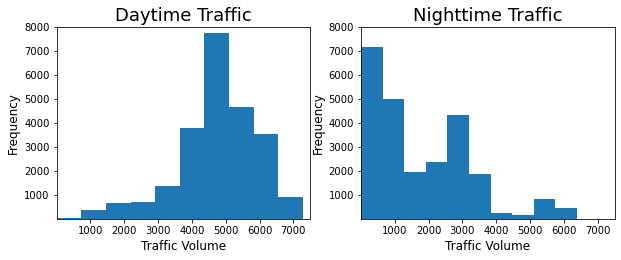

In [19]:
plt.figure(figsize=(10,12))
plt.subplot(3,2,1)
plt.hist(daytime["traffic_volume"])
plt.title("Daytime Traffic", fontsize=18)
plt.xlabel("Traffic Volume", fontsize = 12)
plt.ylabel("Frequency", fontsize=12)
plt.ylim([1,8000])
plt.xlim([1,7500])

plt.subplot(3,2,2)
plt.hist(nighttime["traffic_volume"])
plt.title("Nighttime Traffic", fontsize = 18)
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Traffic Volume", fontsize=12)
plt.ylim([1,8000])
plt.xlim([1, 7500])

plt.show()

In [20]:
daytime.traffic_volume.describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [21]:
nighttime.traffic_volume.describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume durning the day is left skewed. This means that most of the traffic values are high - there are 4,252 or more cars passing the station each hour 75 % of the time ( because 25 % of values are less than 4,252).

The histogram showing the nighttime data is right skewed. This means that most of the values are low - 75 % of the time the number of cars that passet the station each hour is less than 2,819

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## Time indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

We're going to look at a few line plots showing how the traffic volume changes according to the following:

* Month

* Day of the week

* Time of day

In [25]:
daytime["month"] = daytime["date_time"].dt.month

In [26]:
daytime.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10


In [31]:
by_month = daytime.groupby('month').mean()
by_month

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609
6,294.576068,0.271121,0.000000,48.612374,4898.019566
7,296.785052,4.412258,0.000000,42.176619,4595.035744
8,295.119191,0.228113,0.000000,42.556892,4928.302035
9,292.520287,0.289807,0.000000,45.184112,4870.783145


<AxesSubplot:xlabel='month'>

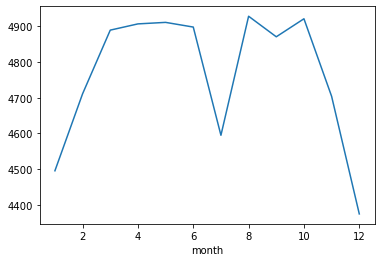

In [32]:
by_month["traffic_volume"].plot.line()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.

In [34]:
daytime["year"] = daytime.date_time.dt.year
daytime["year"].unique()

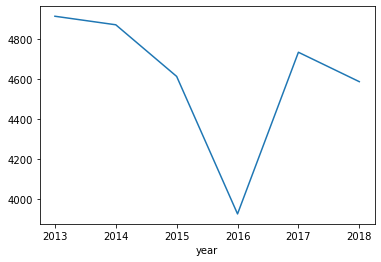

In [49]:
only_july = daytime.loc[daytime.month == 7]
only_july.groupby("year").mean().traffic_volume.plot.line()
plt.show()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — [this article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

## Time indicators pt.2

Let's inspect the more granular data: traffic in the days of the week:

In [52]:
daytime["day"] = daytime.date_time.dt.dayofweek

In [59]:
daytime["day"].unique() #  Monday is 0 and Sunday is 6:

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [56]:
groupby_day_of_week = daytime.groupby("day").mean()

<AxesSubplot:xlabel='day'>

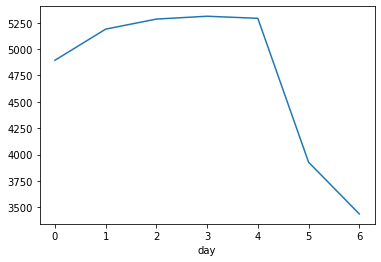

In [58]:
groupby_day_of_week["traffic_volume"].plot.line()

We can see that in business days the traffic volume is bigger than on weekends, cause might be that most people that use this road go to work or coming back from work, so they re using it in business days, not on weekends

## Time indicators pt.3

Now we re gonna inspect traffic volume in the particular hour of the day, but at first we re gonna split it in two separate data sets:


* business day

* weekend


In [85]:
business_days = [0,1,2,3,4] #  this is Monday to Friday
weekenddays = [5,6]

business_day = daytime.loc[daytime.day.isin(business_days)].copy()

weekends = daytime.loc[daytime.day.isin(weekenddays)].copy()

In [86]:
print(business_day.day.unique())
print()
print(weekends.day.unique())

[1 2 3 4 0]

[5 6]


In [87]:
business_day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,year,day
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,2012,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,2012,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,2012,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,2012,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,2012,1


In [88]:
weekends.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,year,day
87,None,275.17,0.0,0.0,1,Clear,sky is clear,2012-10-06 07:00:00,2072,10,2012,5
88,None,274.99,0.0,0.0,1,Clear,sky is clear,2012-10-06 08:00:00,3342,10,2012,5
89,None,275.09,0.0,0.0,40,Clouds,scattered clouds,2012-10-06 09:00:00,4258,10,2012,5
90,None,276.88,0.0,0.0,20,Clouds,few clouds,2012-10-06 10:00:00,4861,10,2012,5
91,None,278.04,0.0,0.0,20,Clouds,few clouds,2012-10-06 11:00:00,5191,10,2012,5


In [89]:
business_day["hour"] = daytime.date_time.dt.hour
weekends["hour"] = daytime.date_time.dt.hour

Now we re gonna use groupby method it and finally plot it:

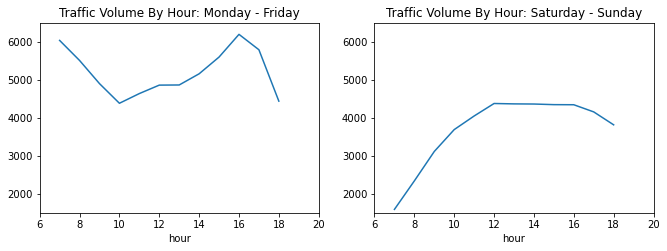

In [108]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
business_day.groupby("hour").mean().traffic_volume.plot.line()
plt.title("Traffic Volume By Hour: Monday - Friday")
plt.ylim(1500,6500)
plt.xlim(6,20)


plt.subplot(1,2,2)
weekends.groupby("hour").mean().traffic_volume.plot.line()
plt.title("Traffic Volume By Hour: Saturday - Sunday")
plt.ylim(1500,6500)
plt.xlim(6,20)

plt.show()

At each hour of the day traffic is generally higher on the business days rather than on weekends,
the rush hours are around 7 and 16 then it starts to decrease, there's the hours when people go to work and back. We see volumes of over 6,000 cars at rush hours.

Summarize:

* Traffic is heavier during warm months (March-October) comparet to cold months (November - Febuary)

* The traffic is usually heavier on business days compared to the weekends.

* On business days, the rush hours are around 7 and 16.

## Weather indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: 
*temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.*

We re gonna inspect the correlation in traffic volume and this particular columns

In [109]:
daytime.corr().traffic_volume

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
day              -0.416453
Name: traffic_volume, dtype: float64

We can see weak positive corellation in the temp column

Let's create the scatter plot to see the correlation

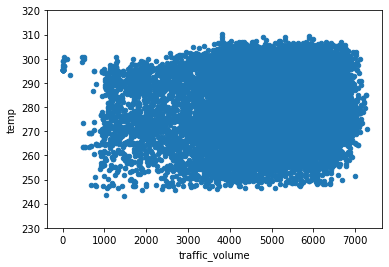

In [112]:
daytime.plot.scatter("traffic_volume", "temp")
plt.ylim(230,320)
plt.show()

We can conclude that the temperature doesn't look like a solid indicator of heavy traffic

Let's now examine another weather columns: *weather_main* and *weather_description*

## Weather types

we examined the correlation between traffic_volume and the numerical weather columns. However, we didn't find any reliable indicator of heavy traffic.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: *weather_main* and *weather_description.*

In [120]:
print(daytime.weather_description.unique())
print()
print(daytime.weather_main.unique())

['scattered clouds' 'broken clouds' 'overcast clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' 'mist' 'haze'
 'proximity shower rain' 'moderate rain' 'drizzle' 'heavy intensity rain'
 'fog' 'proximity thunderstorm' 'heavy snow' 'snow' 'freezing rain'
 'shower snow' 'light rain and snow' 'light intensity shower rain'
 'thunderstorm with heavy rain' 'thunderstorm with rain'
 'thunderstorm with light rain' 'proximity thunderstorm with rain'
 'heavy intensity drizzle' 'Sky is Clear' 'very heavy rain'
 'proximity thunderstorm with drizzle' 'light snow'
 'thunderstorm with drizzle' 'thunderstorm' 'smoke' 'SQUALLS'
 'light shower snow' 'sleet' 'thunderstorm with light drizzle'
 'shower drizzle']

['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Smoke' 'Squall']


using the groupby column we re gonna to calculate the average traffic volume associated with each unique value in these two columns:

In [121]:
groupby_weather_desc = daytime.groupby("weather_description").mean()
groupby_weather_main = daytime.groupby("weather_main").mean()

In [122]:
groupby_weather_desc

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,year,day
weather_description,,,,,,,,
SQUALLS,296.730000,1.020000,0.000000,75.000000,4211.000000,7.000000,2016.000000,2.000000
Sky is Clear,293.232549,0.000000,0.000000,0.000000,4919.009390,7.557512,2014.723005,2.895540
broken clouds,282.372927,0.000000,0.000000,72.635875,4824.130326,6.675260,2015.266380,2.998210
drizzle,283.573777,0.145072,0.000000,88.589928,4737.330935,7.244604,2015.762590,3.028777
few clouds,284.272965,0.000000,0.000000,19.391951,4839.818023,6.159230,2015.139983,2.977253
fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2015.814917,2.798343
freezing rain,272.860000,0.000000,0.000000,90.000000,4314.000000,6.500000,2014.500000,0.500000
haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2015.557554,2.754197
heavy intensity drizzle,285.467931,0.276207,0.000000,89.172414,4738.586207,7.551724,2015.793103,2.896552


In [123]:
groupby_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,year,day
weather_main,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,6.490599,2015.619429,3.138928
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,6.393243,2015.321420,3.005631
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,7.105323,2015.882220,2.934315
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,6.646409,2015.814917,2.798343
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,5.832134,2015.557554,2.754197
Mist,279.420825,0.249992,0.000825,74.961435,4623.976475,6.734285,2015.527574,2.895102
Rain,287.089601,3.972943,0.000292,75.870116,4815.568462,6.774023,2015.572334,2.914467
Smoke,292.405833,0.878333,0.000000,53.333333,4564.583333,6.833333,2015.916667,2.416667
Snow,267.984505,0.014017,0.001768,80.501376,4396.321183,6.374828,2015.486245,2.750344


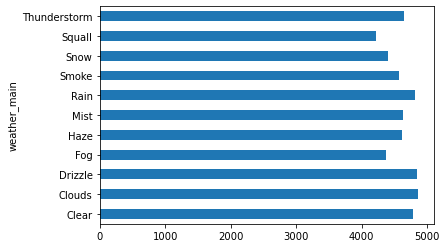

In [130]:
groupby_weather_main.traffic_volume.plot.barh()
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more granular weather classification.

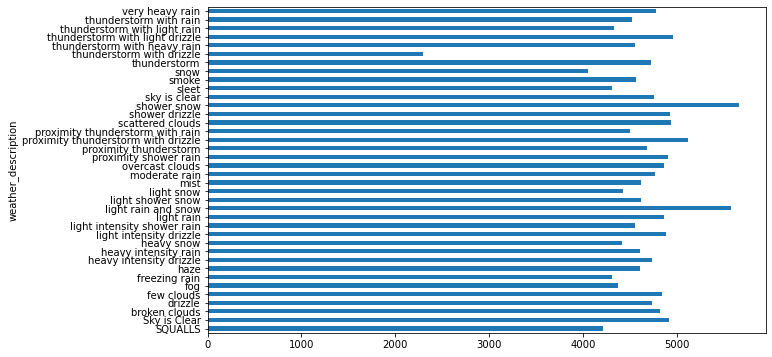

In [132]:
groupby_weather_desc.traffic_volume.plot.barh(figsize=(10,6))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

Shower snow
Light rain and snow
Proximity thunderstorm with drizzle
It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

* Time indicators:
    * Traffic is heavier during warm months (March-October) comparet to cold months (November - Febuary)

    * The traffic is usually heavier on business days compared to the weekends.

    * On business days, the rush hours are around 7 and 16.
* Weather indicators:
    * Shower snow
    * Light rain and snow
    * Proximity thunderstorm with drizzle